### CAPÍTULO 6

**Regressão Linear**

A Regressão Linear permite gerar um modelo matemático através de uma reta que explique a relação linear entre variáveis. No caso mais simples, teremos a relação entre uma variável explicativa X e uma variável resposta Y. O modelo estatístico de Regressão Linear com duas variáveis pode ser representado pela seguinte equação.

y = α + βx

Onde:

y: o y seria os valores previstos, que queremos fazer uma previsão sobre ele(s);

x: seria a variável independente;

α: o valor alfa indica o valor de “y”, quando “x” for igual a zero;

β: seria a variável que determina o quão inclinada a reta será, pois, ela determinará se a relação entre as variáveis é grande ou pequena. 

*Reflexões sobre correlação e causalidade*

Correlação é quando dois fenômenos estão indo juntos e são relativamente fáceis de medir. Porém, a correlação não implica necessariamente na causalidade. Podem ter correlação similares, coincidências, mas para haver causalidade precisamos estudar a fundo.

No site abaixo podemos checar uma série de correções espúrias, que não há causalidade:
https://www.tylervigen.com/spurious-correlations

Em resumo:

**O que é correlação?**: Descreve o tipo de relação entre variáveis.

**O que é causalidade?**: Está associada a idea de "contafactual" (se eu faço isso, eu tenho aquilo, basicamente).

*O que podemos fazer?*

Analisar grupos similares, experimentos, modelagem diferencial e contexto e hipóteses. Mas principalmente, revisar hipóteses de tempos em tempos.

**Estatística Computacional – Regressão Linear no Python**

In [1]:
#Regressão Linear

import pandas as pd

In [2]:
#Dados a serem trabalhados

dados = pd.DataFrame({"Vendas_Cimento":[2939, 2837, 2788, 3349, 2609, 2820, 3444, 2993, 3225,2593, 2479, 2641,3093,2648,2905,3241,2972, 3268, 2544,2751,2850,3371, 2798,2367,3037, 2605, 3036,3083,3059,3052], 
"Preco_Cimento":
[94,90,108,81,121,120,80,86,96,114,122, 123,92,108,92,90,105,85,127,99,91,91,99,125,96,127,87,82,101,83],
"Propaganda":
['N','N','N','S','N','S','S','N','S','N','N','S','S','N','N','S','S','S','S','N','N','S','N','N','S','S','N','N','S','N'],
"PIB" :
[1.2,1.4,1.6,1.4,1.9,2.0,1.3,1.5,1.7,1.2,1.2,2.0,1.0,1.2,1.3,2.0,2.0,1.5,1.8,1.6,1.6,1.9,1.4,1.0,1.1,1.6,1.4,1.3,1.0,1.6]
})

print(dados)

    Vendas_Cimento  Preco_Cimento Propaganda  PIB
0             2939             94          N  1.2
1             2837             90          N  1.4
2             2788            108          N  1.6
3             3349             81          S  1.4
4             2609            121          N  1.9
5             2820            120          S  2.0
6             3444             80          S  1.3
7             2993             86          N  1.5
8             3225             96          S  1.7
9             2593            114          N  1.2
10            2479            122          N  1.2
11            2641            123          S  2.0
12            3093             92          S  1.0
13            2648            108          N  1.2
14            2905             92          N  1.3
15            3241             90          S  2.0
16            2972            105          S  2.0
17            3268             85          S  1.5
18            2544            127          S  1.8


In [3]:
#Plotagem para visualizar vendas x preço

import matplotlib.pyplot as plt

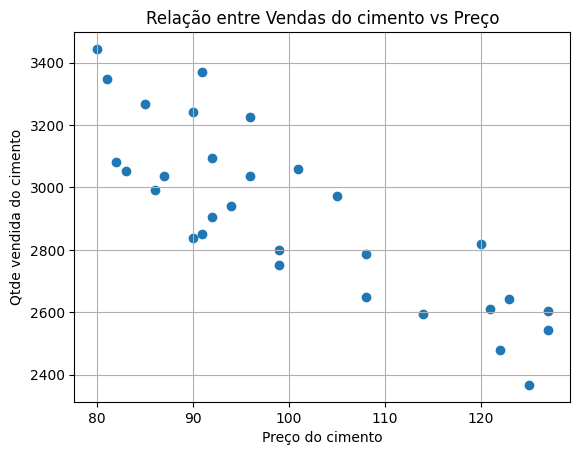

In [4]:
plt.scatter(x=dados['Preco_Cimento'],
y=dados['Vendas_Cimento'], marker='o')
plt.title('Relação entre Vendas do cimento vs Preço')
plt.xlabel('Preço do cimento')
plt.ylabel('Qtde vendida do cimento')
plt.grid(True)
plt.show()

In [5]:
#Correlação
correlacao = dados['Vendas_Cimento'].corr(dados['Preco_Cimento'])
print('Correlação entre Vendas_Cimento e Preco_Cimento:', correlacao)

Correlação entre Vendas_Cimento e Preco_Cimento: -0.838644119315961


In [8]:
#Regressão com o sklear.linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
#Criar e treinar o modelo de regressão linear
model = LinearRegression()

X = dados[['Preco_Cimento']].values
Y = dados['Vendas_Cimento'].values

model.fit(x, y)

LinearRegression()

In [12]:
#Fazer previsões
Y_pred = model.predict(x)

#Avaliar o modelo
mse = mean_squared_error(Y, Y_pred)
r2 = r2_score(  y, Y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 22605.185134448762
R-squared: 0.7033239588632441


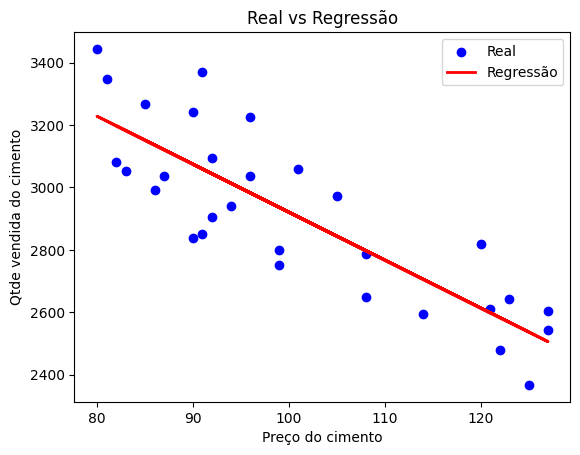

In [13]:
#Visulizar os resultados
plt.scatter(X, Y, color='blue', label='Real')
plt.plot(X, Y_pred, color='red', linewidth=2, label='Regressão')
plt.title('Real vs Regressão')
plt.xlabel('Preço do cimento')
plt.ylabel('Qtde vendida do cimento')
plt.legend()
plt.show()

In [17]:
#Para saber os coeficientes do modelo, podemos utilizar um comando como o seguinte:
coeficiente = model.coef_[0] #Inclinação (coeficiante da variável independente)
intercepto = model.intercept_ #Intercepto (constante)

print(f'Coeficiente (Inclinação): {coeficiente}')
print(f'Intercepto: {intercepto}')

Coeficiente (Inclinação): -15.37216138752113
Intercepto: 4458.135552779207


In [18]:
#Fazendo o mesmo procedimento, para PIB X Vendas cimento

import matplotlib.pyplot as plt

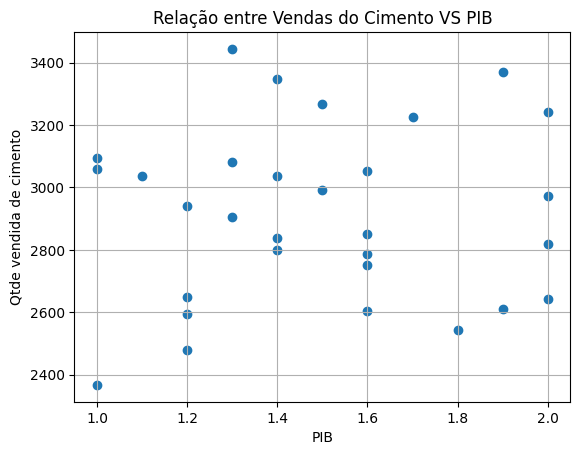

In [19]:
plt.scatter(x = dados['PIB'], y = dados['Vendas_Cimento'], marker='o')
plt.title('Relação entre Vendas do Cimento VS PIB')
plt.xlabel('PIB')
plt.ylabel('Qtde vendida de cimento')
plt.grid(True)
plt.show()